In [1]:
import pandas as pd
import numpy as np
import warnings

from pandas.core.interchange.dataframe_protocol import DataFrame

warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

## Sorting out NaNs and weird length/width combinations

In [2]:
df = pd.read_csv('data/turtles_cleaned.csv')

In [3]:
df.head()

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CaptureSiteCategory,CalendarWeek
0,CaptureSite_0,Ocean,Species_6,64.70,62.60,NaN,CaptureSiteCategory_2,50
1,CaptureSite_0,Ocean,Species_6,35.85,31.35,NaN,CaptureSiteCategory_2,42
2,CaptureSite_0,Ocean,Species_5,51.80,49.20,NaN,CaptureSiteCategory_2,43
3,CaptureSite_0,Ocean,Species_6,60.50,59.00,NaN,CaptureSiteCategory_2,10
4,CaptureSite_0,Ocean,Species_5,34.70,33.00,NaN,CaptureSiteCategory_2,31


In [4]:
df.shape

(18062, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaptureSite          18062 non-null  object 
 1   ForagingGround       18062 non-null  object 
 2   Species              18062 non-null  object 
 3   CCL_cm               18038 non-null  float64
 4   CCW_cm               18035 non-null  float64
 5   Weight_Kg            12653 non-null  float64
 6   CaptureSiteCategory  18062 non-null  object 
 7   CalendarWeek         18062 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [6]:
df[['Weight_Kg', 'CCL_cm', 'CCW_cm']] = \
    df[['Weight_Kg', 'CCL_cm', 'CCW_cm']].replace(0, np.nan)

In [7]:
df = df.dropna(subset=['CCL_cm', 'CCW_cm'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18033 entries, 0 to 18061
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaptureSite          18033 non-null  object 
 1   ForagingGround       18033 non-null  object 
 2   Species              18033 non-null  object 
 3   CCL_cm               18033 non-null  float64
 4   CCW_cm               18033 non-null  float64
 5   Weight_Kg            12650 non-null  float64
 6   CaptureSiteCategory  18033 non-null  object 
 7   CalendarWeek         18033 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


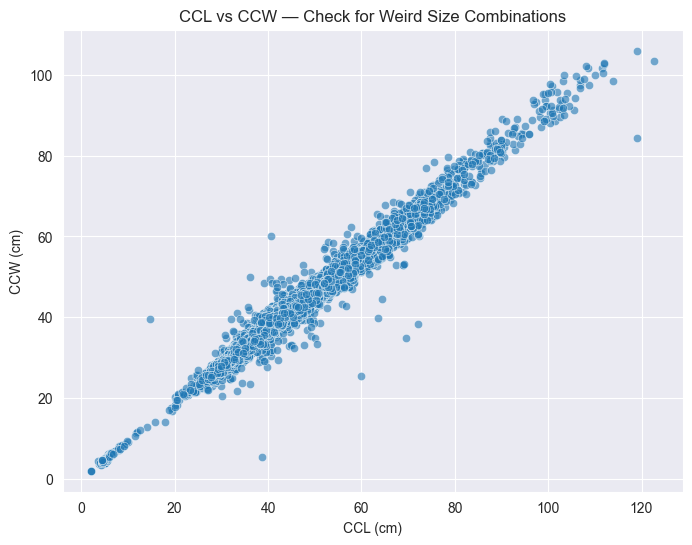

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CCL_cm', y='CCW_cm', alpha=0.6)
plt.title("CCL vs CCW — Check for Weird Size Combinations")
plt.xlabel("CCL (cm)")
plt.ylabel("CCW (cm)")
plt.show()

In [10]:
ratio = df['CCL_cm'] / df['CCW_cm']
df = df[(ratio > 0.5) & (ratio < 2)]

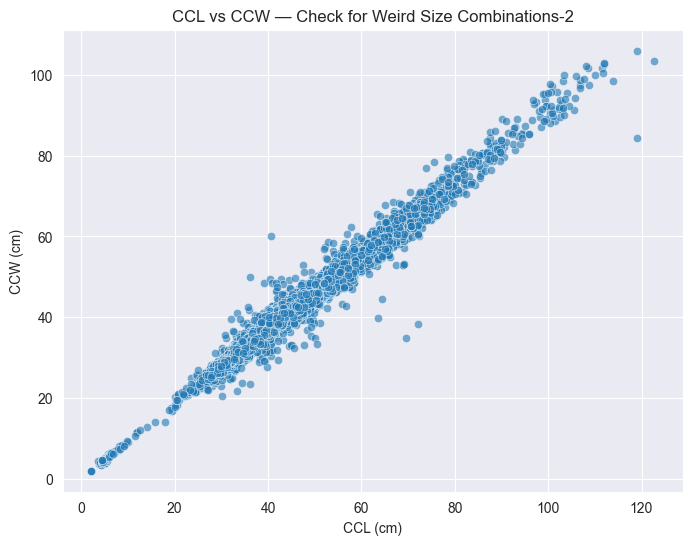

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CCL_cm', y='CCW_cm', alpha=0.6)
plt.title("CCL vs CCW — Check for Weird Size Combinations-2")
plt.xlabel("CCL (cm)")
plt.ylabel("CCW (cm)")
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18030 entries, 0 to 18061
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaptureSite          18030 non-null  object 
 1   ForagingGround       18030 non-null  object 
 2   Species              18030 non-null  object 
 3   CCL_cm               18030 non-null  float64
 4   CCW_cm               18030 non-null  float64
 5   Weight_Kg            12647 non-null  float64
 6   CaptureSiteCategory  18030 non-null  object 
 7   CalendarWeek         18030 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

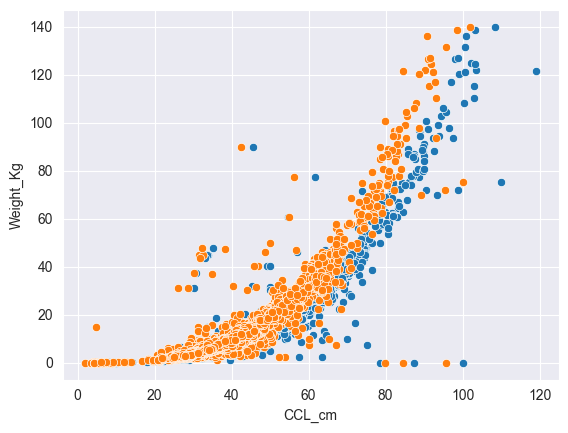

In [13]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')

In [14]:
df.nsmallest(10, 'Weight_Kg') # here we see three datapoints with good CCL CCW but weird Weight

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CaptureSiteCategory,CalendarWeek
10392,CaptureSite_24,Ocean,Species_6,5.4,5.2,0.02,CaptureSiteCategory_2,17
1083,CaptureSite_10,Ocean,Species_6,5.7,6.1,0.03,CaptureSiteCategory_2,20
1335,CaptureSite_10,Ocean,Species_6,8.1,7.2,0.03,CaptureSiteCategory_2,13
4908,CaptureSite_15,Creek,Species_0,2.0,2.0,0.03,CaptureSiteCategory_0,18
6828,CaptureSite_19,Ocean,Species_4,87.5,84.5,0.03,CaptureSiteCategory_2,30
12942,CaptureSite_25,Creek,Species_6,6.0,5.6,0.03,CaptureSiteCategory_0,15
14586,CaptureSite_4,Ocean,Species_4,78.6,79.8,0.03,CaptureSiteCategory_2,28
17585,CaptureSite_9,Ocean,Species_5,100.0,95.6,0.03,CaptureSiteCategory_1,13
7739,CaptureSite_21,Creek,Species_6,5.9,5.5,0.04,CaptureSiteCategory_0,25
2167,CaptureSite_12,Ocean,Species_5,6.0,6.0,0.05,CaptureSiteCategory_2,23


In [15]:
# convert all the weird Weight values to NaN
df.loc[(df['CCL_cm'] > 78) & (df['Weight_Kg'] < 0.05), 'Weight_Kg'] = np.nan
df.loc[(df['CCL_cm'] < 40) & (df['Weight_Kg'] > 30), 'Weight_Kg'] = np.nan
df.loc[(df['CCL_cm'] < 70) & (df['Weight_Kg'] > 70), 'Weight_Kg'] = np.nan
df.loc[(df['CCL_cm'] < 10) & (df['Weight_Kg'] > 10), 'Weight_Kg'] = np.nan
df.loc[(df['CCW_cm'] < 43) & (df['Weight_Kg'] > 30), 'Weight_Kg'] = np.nan
df.loc[(df['CCL_cm'] > 109) & (df['Weight_Kg'] > 70), 'Weight_Kg'] = np.nan


<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

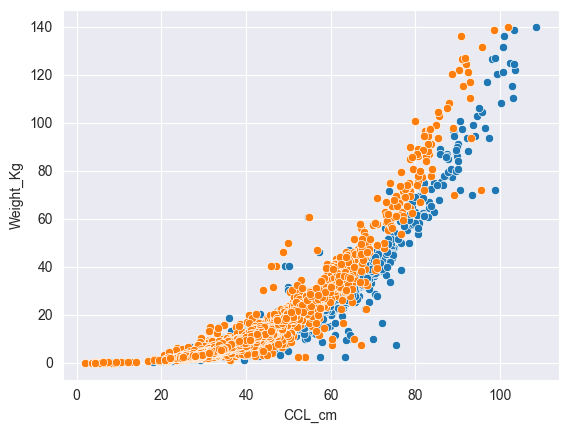

In [16]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18030 entries, 0 to 18061
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaptureSite          18030 non-null  object 
 1   ForagingGround       18030 non-null  object 
 2   Species              18030 non-null  object 
 3   CCL_cm               18030 non-null  float64
 4   CCW_cm               18030 non-null  float64
 5   Weight_Kg            12629 non-null  float64
 6   CaptureSiteCategory  18030 non-null  object 
 7   CalendarWeek         18030 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [18]:
df.head()

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CaptureSiteCategory,CalendarWeek
0,CaptureSite_0,Ocean,Species_6,64.70,62.60,NaN,CaptureSiteCategory_2,50
1,CaptureSite_0,Ocean,Species_6,35.85,31.35,NaN,CaptureSiteCategory_2,42
2,CaptureSite_0,Ocean,Species_5,51.80,49.20,NaN,CaptureSiteCategory_2,43
3,CaptureSite_0,Ocean,Species_6,60.50,59.00,NaN,CaptureSiteCategory_2,10
4,CaptureSite_0,Ocean,Species_5,34.70,33.00,NaN,CaptureSiteCategory_2,31


## KNN imputation of weight

In [19]:
# need to separate the hatchlings (other "size vs weight" regime than in adults)
df[(df['CCW_cm'] < 20) & (df['CCW_cm'] > 15)].sort_values('CCW_cm')

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CaptureSiteCategory,CalendarWeek
5981,CaptureSite_16,Creek,Species_6,19.40,16.8,0.78,CaptureSiteCategory_4,46
8442,CaptureSite_23,Creek,Species_5,18.70,17.0,NaN,CaptureSiteCategory_0,22
1845,CaptureSite_12,Ocean,Species_5,19.10,17.5,NaN,CaptureSiteCategory_2,26
8461,CaptureSite_23,Creek,Species_6,20.10,17.8,NaN,CaptureSiteCategory_0,12
6738,CaptureSite_19,Ocean,Species_6,20.10,18.2,1.21,CaptureSiteCategory_2,35
2712,CaptureSite_13,Ocean,Species_6,20.40,18.3,1.57,CaptureSiteCategory_2,15
13321,CaptureSite_26,Ocean,Species_5,20.33,19.5,0.95,CaptureSiteCategory_3,38
14527,CaptureSite_4,Ocean,Species_6,20.50,19.5,1.09,CaptureSiteCategory_2,20
2688,CaptureSite_13,Ocean,Species_6,20.90,19.6,1.20,CaptureSiteCategory_2,7


In [20]:
df['life_stage'] = np.where(df['CCL_cm'] < 18, 'hatchling', 'other')
df.head()

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CaptureSiteCategory,CalendarWeek,life_stage
0,CaptureSite_0,Ocean,Species_6,64.70,62.60,NaN,CaptureSiteCategory_2,50,other
1,CaptureSite_0,Ocean,Species_6,35.85,31.35,NaN,CaptureSiteCategory_2,42,other
2,CaptureSite_0,Ocean,Species_5,51.80,49.20,NaN,CaptureSiteCategory_2,43,other
3,CaptureSite_0,Ocean,Species_6,60.50,59.00,NaN,CaptureSiteCategory_2,10,other
4,CaptureSite_0,Ocean,Species_5,34.70,33.00,NaN,CaptureSiteCategory_2,31,other


In [21]:
cols = ['CCL_cm', 'CCW_cm', 'Weight_Kg']

df_imputed_list = []

for stage in ['hatchling', 'other']:
    sub = df[df['life_stage'] == stage].copy()
    
    # choose k
    k = 3 if stage == 'hatchling' else 5
    
    imputer = KNNImputer(n_neighbors=k)
    sub[cols] = imputer.fit_transform(sub[cols])
    
    df_imputed_list.append(sub)

# put groups back together
df = pd.concat(df_imputed_list).sort_index()

In [22]:
df[['CCL_cm', 'CCW_cm', 'Weight_Kg']].isna().sum()

CCL_cm       0
CCW_cm       0
Weight_Kg    0
dtype: int64

In [23]:
df.drop(['life_stage'], inplace=True, axis=1)
df.head()

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CaptureSiteCategory,CalendarWeek
0,CaptureSite_0,Ocean,Species_6,64.70,62.60,31.490,CaptureSiteCategory_2,50
1,CaptureSite_0,Ocean,Species_6,35.85,31.35,4.852,CaptureSiteCategory_2,42
2,CaptureSite_0,Ocean,Species_5,51.80,49.20,16.776,CaptureSiteCategory_2,43
3,CaptureSite_0,Ocean,Species_6,60.50,59.00,29.614,CaptureSiteCategory_2,10
4,CaptureSite_0,Ocean,Species_5,34.70,33.00,5.310,CaptureSiteCategory_2,31


<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

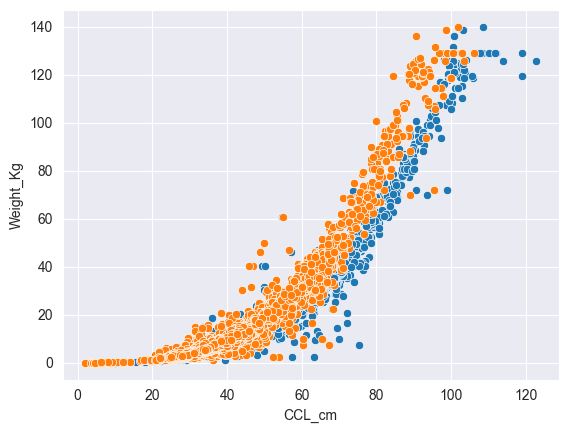

In [24]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')

## Encoding of categorical features

In [25]:
X = df.drop(columns=['CaptureSite', 'CaptureSiteCategory']) # dropping CaptureSite to avoid leakage
y = df['CaptureSite'] # this should remain a categorical label for the prediction
y_alt = df['CaptureSiteCategory'] # this should remain a categorical label for the prediction

In [26]:
#cat_cols = ['ForagingGround', 'Species']

#X = pd.get_dummies(
#    X,
#    columns=cat_cols,
#    drop_first=True    # avoid one dummy per category set
#)


In [27]:
X.columns

Index(['ForagingGround', 'Species', 'CCL_cm', 'CCW_cm', 'Weight_Kg',
       'CalendarWeek'],
      dtype='object')

In [28]:
X.shape

(18030, 6)

In [29]:
X.head()

,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CalendarWeek
0,Ocean,Species_6,64.70,62.60,31.490,50
1,Ocean,Species_6,35.85,31.35,4.852,42
2,Ocean,Species_5,51.80,49.20,16.776,43
3,Ocean,Species_6,60.50,59.00,29.614,10
4,Ocean,Species_5,34.70,33.00,5.310,31


In [30]:
X.dtypes

ForagingGround     object
Species            object
CCL_cm            float64
CCW_cm            float64
Weight_Kg         float64
CalendarWeek        int64
dtype: object

## Train test split

In [31]:
# X and y defined before encoding, see above

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X, y_alt,
    test_size=0.30,
    random_state=42,
    stratify=y
)

In [32]:
pd.DataFrame(X_train).to_csv('data/X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('data/X_test.csv', index=False)
pd.DataFrame(X_train_alt).to_csv('data/X_train_alt.csv', index=False)
pd.DataFrame(X_test_alt).to_csv('data/X_test_alt.csv', index=False)

pd.DataFrame(y_train).to_csv('data/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('data/y_test.csv', index=False)
pd.DataFrame(y_train_alt).to_csv('data/y_train_alt.csv', index=False)
pd.DataFrame(y_test_alt).to_csv('data/y_test_alt.csv', index=False)